In [19]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv("Datasets/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
#df_one_hot_encoded = pd.get_dummies(df)

In [24]:
#X = df_one_hot_encoded.drop(["charges"], axis=1)
#y = df_one_hot_encoded["charges"]

In [45]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

CT = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = df.drop(["charges"], axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

CT.fit(X_train)

X_train_normal = CT.transform(X_train)
X_test_normal = CT.transform(X_test)

In [42]:
X_test_normal

array([[0.26086957, 0.22706484, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.91304348, 0.45305354, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.26086957, 0.3220339 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06521739, 0.28087167, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.08695652, 0.3322572 , 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.04347826, 0.39615281, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [54]:
#Model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(400, activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mse,
                        optimizer=tf.keras.optimizers.Adam(lr=0.004),
                        metrics=['mae'])
history = insurance_model.fit(X_train_normal, y_train, epochs=200)

C:\Users\aksha\PycharmProjects\TF\venv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
34/34 [==============================] - 0s 3ms/step - loss: 304477248.0000 - mae: 12853.0898
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 302666080.0000 - mae: 12782.3516
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 300916000.0000 - mae: 12714.6553
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 299192288.0000 - mae: 12646.7080
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 297496928.0000 - mae: 12579.1367
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 295812896.0000 - mae: 12512.5273
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 294148704.0000 - mae: 12445.1475
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 292500608.0000 - mae: 12378.2100
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 290861568.0000 - mae: 12312.7881
Epoch 10/200
34/34 [==========================

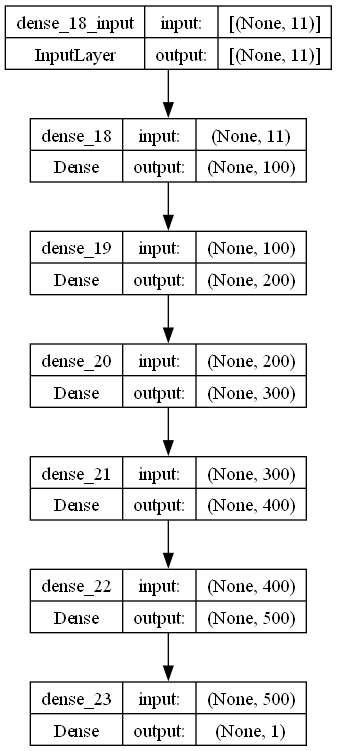

In [31]:
from keras.utils import plot_model
plot_model(insurance_model, show_shapes=True)

In [50]:
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2210.6318 - mae: 2210.6318


[2210.6318359375, 2210.6318359375]

Text(0, 0.5, 'loss')

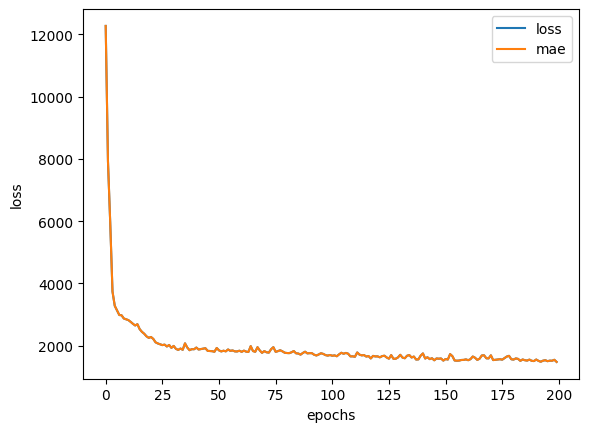

In [52]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")